In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [4]:
df=pd.read_excel("cookie_cats.xlsx")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


No missing value

In [8]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<Axes: >

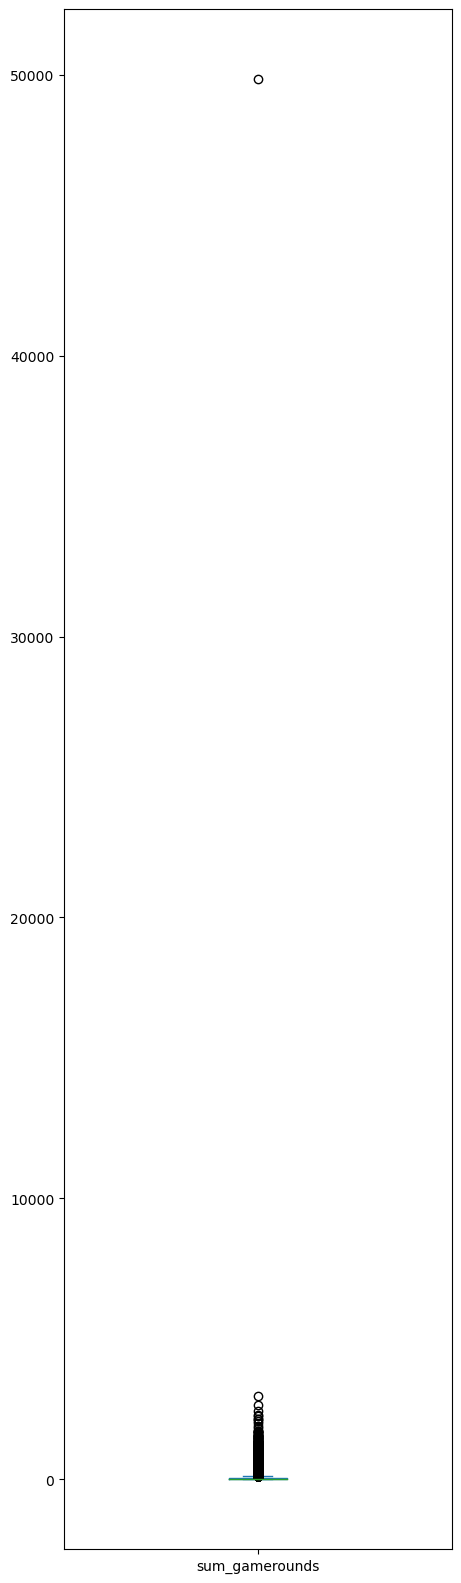

In [7]:
df['sum_gamerounds'].plot.box(figsize=(5,20))

In [16]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [17]:
#Counting the number of players for each number of gamerounds
plot_df=df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

Text(0.5, 0, '# Game rounds')

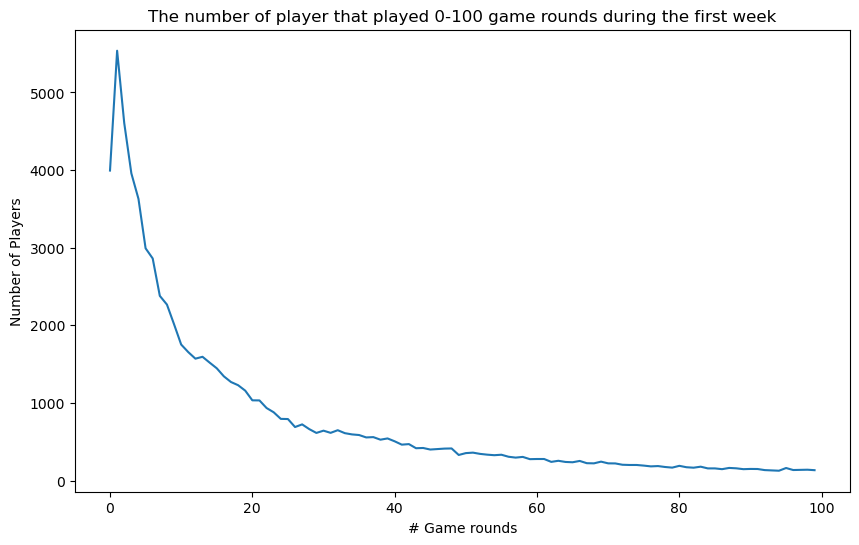

In [15]:
#plot the distribution of players that played 0 to 100 game round during their week playing the game.
%matplotlib inline
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of player that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Bootstring:Should we be condident in the difference?

In [18]:
df.sample(frac=1,replace=True)


,userid,version,sum_gamerounds,retention_1,retention_7
43033,4758366,gate_40,26,False,False
8943,983137,gate_30,24,True,False
20352,2262441,gate_40,51,False,False
75479,8358999,gate_30,23,True,False
45086,4995172,gate_40,79,True,False
...,...,...,...,...,...
48532,5381499,gate_30,10,False,False
75324,8341371,gate_40,37,False,False
57723,6392562,gate_40,28,False,False
9003,990297,gate_30,13,False,False


<Axes: xlabel='version', ylabel='sum_gamerounds'>

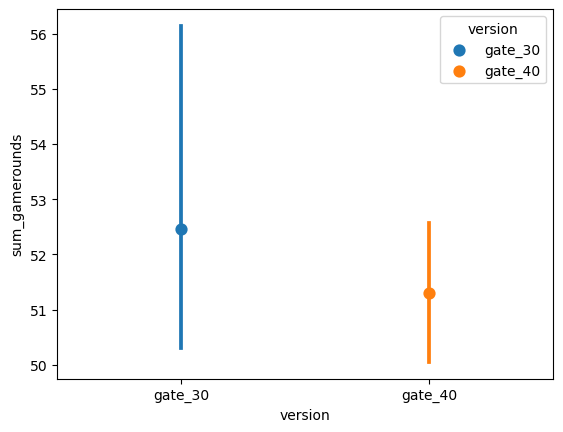

In [52]:
sns.pointplot(x='version',y='sum_gamerounds',hue='version',data=df,estimator=np.mean,errorbar=('ci', 99),
              n_boot=1000,markers="o",
              linestyles=":")
#30关和40关以后，玩的关卡总和的平均值

<Axes: xlabel='version', ylabel='sum_gamerounds'>

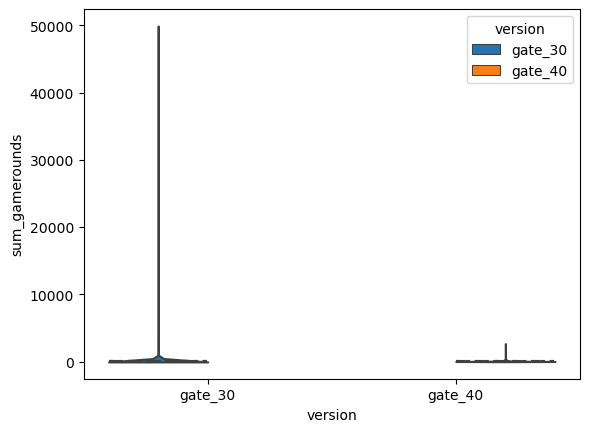

In [19]:
sns.violinplot(x='version',y='sum_gamerounds',hue='version',data=df,
              hue_order=None, scale="area",
                        scale_hue=True, gridsize=100,
                        width=.8, inner="quartile",  saturation=.95)

Heatmap

In [26]:
gate_30=df[df['version']=='gate_30']
gate_40=df[df['version']=='gate_40']

<Axes: >

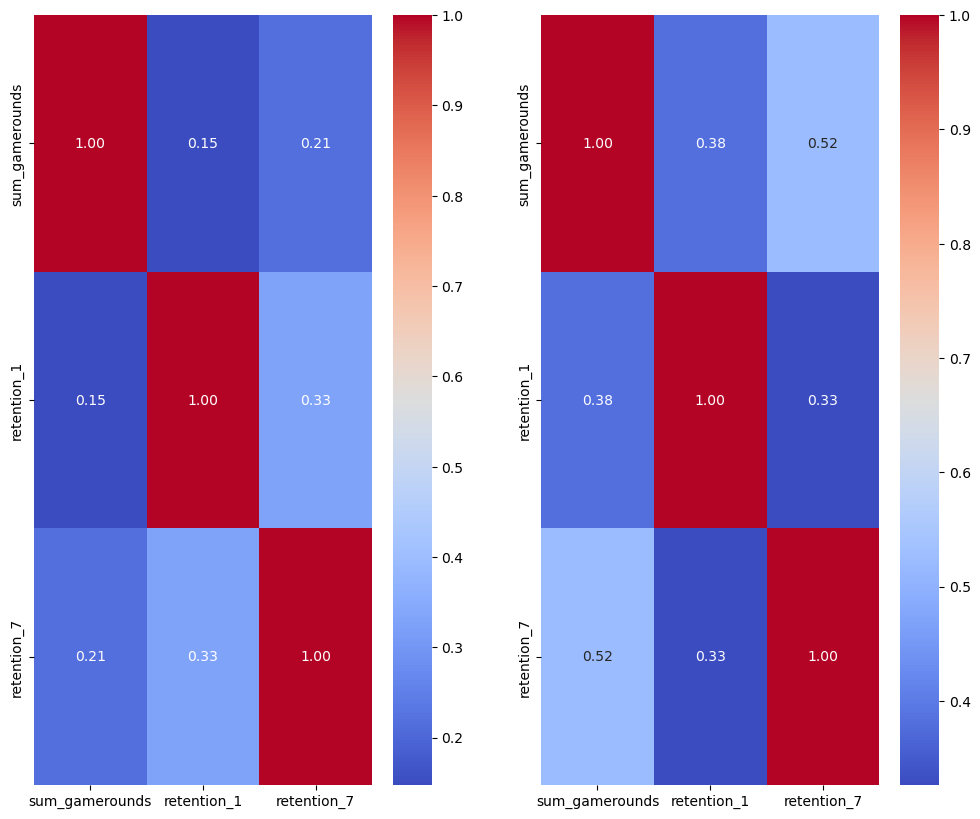

In [27]:
# 设置画布尺寸
plt.figure(figsize=(12, 10))
# 绘制第一个热力图
plt.subplot(1, 2, 1)  # 1行2列，位置为1
sns.heatmap(gate_30[["sum_gamerounds","retention_1","retention_7"]].corr(),annot=True,fmt=".2f",cmap="coolwarm")
# 绘制第二个热力图
plt.subplot(1, 2, 2)  # 1行2列，位置为1
sns.heatmap(gate_40[["sum_gamerounds","retention_1","retention_7"]].corr(),annot=True,fmt=".2f",cmap="coolwarm")

retention_1和retention_7之间的相关性是0.33，表明一个中等的正相关，这意味着如果一个玩家在第一天后继续玩游戏，他们在七天后仍在玩游戏的可能性也会增加。


comparing 1-day retention
Overall 1-day retention

In [28]:
df['retention_1'].mean()#retention_1 rate

0.4452095044850259

In [29]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Bootstrapping：Should we be confident in the difference


In [92]:
df.sample(frac=1,replace=True)

,userid,version,sum_gamerounds,retention_1,retention_7
44326,4908766,gate_30,5,False,False
52817,5864689,gate_30,112,False,True
62159,6886126,gate_30,92,False,True
12911,1430049,gate_30,58,True,False
81006,8971330,gate_40,54,True,False
...,...,...,...,...,...
34413,3811810,gate_30,18,False,False
7778,857117,gate_30,40,False,False
13330,1477488,gate_30,23,True,False
5976,660487,gate_40,169,True,False


In [31]:
df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()

version
gate_30    0.449389
gate_40    0.443006
Name: retention_1, dtype: float64

<Axes: ylabel='Density'>

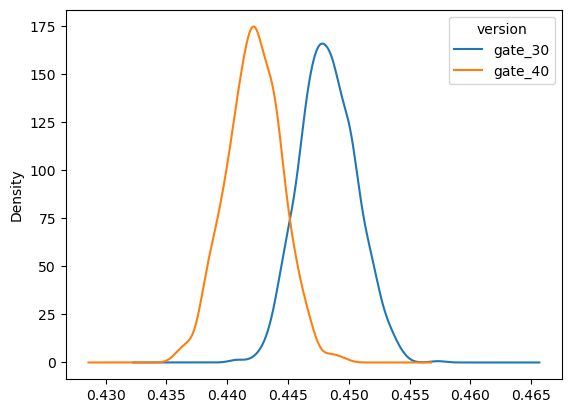

In [39]:
#Creating an list with bootstrapped means for each AB-group
boot_1d=[]
for i in range(1000):
    boot_mean=df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

#Transforming the list to a DataFrame
boot_1d=pd.DataFrame(boot_1d)

#A Kernel Density Estimate plot of the bootstap distributions
boot_1d.plot(kind='density')

Probability that 1-day retention is greater when the gate is at level 30: 0.953


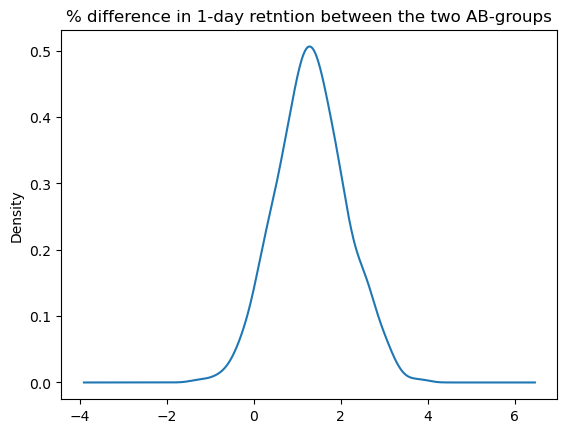

In [43]:
#Adding a column with the % difference between the two AB-Groups
boot_1d['diff']=(boot_1d.gate_30-boot_1d.gate_40)/boot_1d.gate_40*100
#Ploting the bootstrap%difference
ax=boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retntion between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

#从这个图中我们可以看出，最可能的留存率百分比差异大约是1%到2%之间，这个差异表明，将游戏中的关卡门槛设定在30级时，1天内的用户留存率相对于对照组有所提高。图表中还提到了0.962的值，这表示有96.2%的概率，当门槽位于30级时，1天内的留存率会更高

Comparing 7-day Retention

In [48]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

###### creating a list with bootstrapped means for each AB-group
boot_7d=[]
for i in range(500):
    boot_mean=df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

#Transforming the list to a DataFrame
boot_7d=pd.DataFrame(boot_7d)
# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

7天留存gata30比gate40高的概率是99.6%

Z-test in statsmodels

Let's assume that the gate40  have higher intention rate than the gate30 at 5% Type I error. So the hypothesis woule be:


null：𝑝30  - 𝑝40 <=0

alternative：𝑝30  - 𝑝40 >0

In [56]:
import statsmodels.api as sm

In [62]:
convert_gate_30_1 = df[df.version == 'gate_30'].retention_1.sum()
convert_gate_40_1 = df[df.version == 'gate_40'].retention_1.sum()
n_gate_30_1 = len(df[df.version == 'gate_30'].retention_1)
n_gate_40_1 = len(df[df.version == 'gate_40'].retention_1)

convert_gate_30_1,convert_gate_40_1,n_gate_30_1,n_gate_40_1

(20034, 20119, 44700, 45489)

In [83]:
# 定义数据字典
conversion_dict = {
    'Views': {'Gate30': n_gate_30_1 ,'Gate40': n_gate_40_1},
    'Converts': {'Gate30': convert_gate_30_1, 'Gate40': convert_gate_40_1}}

# 创建DataFrame
conversion_table = pd.DataFrame(conversion_dict)
conversion_table['Conversion %'] = conversion_table['Converts'] / conversion_table['Views']
conversion_table['Conversion %'] = conversion_table['Conversion %'].apply(lambda x: str(np.round(x,3)*100)+'%')
print(conversion_table)

        Views  Converts         Conversion %
Gate30  44700     20034  44.800000000000004%
Gate40  45489     20119                44.2%


In [82]:
z_score, p_value = sm.stats.proportions_ztest([convert_gate_30_1, convert_gate_40_1], [n_gate_30_1, n_gate_40_1], alternative='larger')
z_score, p_value

(1.7840862247974725, 0.03720482764845957)

Z得分是1.78，P值是0.037，意味着在5%的显著性水平上，30级门槛的1天留存率显著高于40级的

In [63]:
convert_gate_30_7 = df[df.version == 'gate_30'].retention_7.sum()
convert_gate_40_7 = df[df.version == 'gate_40'].retention_7.sum()
n_gate_30_7 = len(df[df.version == 'gate_30'].retention_7)
n_gate_40_7 = len(df[df.version == 'gate_40'].retention_7)

convert_gate_30_7,convert_gate_40_7,n_gate_30_7,n_gate_40_7

(8502, 8279, 44700, 45489)

In [84]:
# 定义数据字典
conversion_dict = {
    'Views': {'Gate30': n_gate_30_7 ,'Gate40': n_gate_40_7},
    'Converts': {'Gate30': convert_gate_30_7, 'Gate40': convert_gate_40_7}}

# 创建DataFrame
conversion_table = pd.DataFrame(conversion_dict)
conversion_table['Conversion %'] = conversion_table['Converts'] / conversion_table['Views']
conversion_table['Conversion %'] = conversion_table['Conversion %'].apply(lambda x: str(np.round(x,3)*100)+'%')
print(conversion_table)

        Views  Converts Conversion %
Gate30  44700      8502        19.0%
Gate40  45489      8279        18.2%


In [60]:
z_score, p_value = sm.stats.proportions_ztest([convert_gate_30, convert_gate_40], [n_gate_30, n_gate_40], alternative='larger')
z_score, p_value

(3.164358912748191, 0.0007771249878071645)

Z_score是3.16，P值是0.00077，这意味着30级的7天留存率显著高于40级的留存率。

Z-test in our way

In [66]:
def z_test(p1,p0,n1,n0):
    delta = p1-p0
    p = (p1*n1 + p0*n0) / (n1+n0)
    return delta / np.sqrt(p*(1-p)*(1/n1 + 1/n0))

gate_30 1-day retention

In [67]:
p1 = convert_gate_30_1 / n_gate_30_1
p0 = convert_gate_40_1/ n_gate_40_1
n1 = n_gate_30_1
n0 = n_gate_40_1

In [68]:
z_value = z_test(p1,p0,n1,n0)
z_value

1.7840862247974725

In [69]:
from scipy.stats import norm
p_value = 1- norm.cdf(z_value)

p_value

0.03720482764845956

gate_30 7-day retention

In [71]:
p1 = convert_gate_30_7/ n_gate_30_7
p0 = convert_gate_40_7/ n_gate_40_7
n1 = n_gate_30_7
n0 = n_gate_40_7

In [72]:
z_value = z_test(p1,p0,n1,n0)
z_value

3.164358912748191

In [73]:
from scipy.stats import norm
p_value = 1- norm.cdf(z_value)

p_value

0.0007771249878071318